# Experimentacion 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import math


In [4]:
def porcentajeDeProtocolos(path, x_axis, y_axis):
    df = pd.read_csv(path)
    df.drop(index = [0, 1] , inplace=True)
    sns.set(style="whitegrid")
    chart = sns.barplot(x=x_axis,y=y_axis, data=df, palette='Spectral', fmt='d')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

def DistribucionPorTipoFuente(path):
    
    # Leo los datos.
    df = pd.read_csv(path)

    # Integro los broadcast de distintos protocolos a 'BROADCAST' para que solo haya 1 columna.
    dfb=df.filter(like='BROADCAST')
    dfb=dfb.sum(axis = 1, skipna = True)
    
    # Integro los unicast de distintos protocolos a 'UNICAST' para que solo haya 1 columna.
    dfu=df.filter(like='UNICAST')
    dfu=dfu.sum(axis = 1, skipna = True)
    
    # Aplico los cambios
    dft=df.iloc[:, 0]
    df=pd.concat([dft, dfb, dfu], axis=1)
    df.columns =['Time', 'BROADCAST', 'UNICAST']
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    
    # Les cambio los nombres a las columnas
    df.columns = ['informacion', 'simbolo']
    df = df.rename(columns={0: "informacion", "simbolos": "simbolo"})
    df = df.iloc[1:]
    
    #Plot
    sns.set(style="whitegrid")
    chart = sns.barplot(x="simbolo",y="informacion", data=df, palette='Spectral')
    chart.set(yscale="linear")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
def InformacionPorSimbolo(path):
    
    #Leo y me quedo con la ultima fila que son los valores finales.
    df = pd.read_csv(path)
    df = df.tail(1)
    df = df.stack().reset_index(-1).iloc[:, ::-1]
    # Les cambio los nombres a las columnas 
    df.columns = ['informacion', 'simbolo']
    df = df.rename(columns={0: "informacion", "simbolos": "simbolo"})
    df = df.iloc[1:]
    
    #Calculo la informacion de los eventos
    df['informacion'] = ((df['informacion'] / df['informacion'].sum()))
    df['informacion'] = df['informacion'].astype(np.float64)
    df['informacion'] = - np.log(df['informacion'])
   
    #Plot
    sns.set(style="whitegrid")
    chart2 = sns.barplot(x="simbolo",y="informacion", data=df, palette='Spectral')
    chart2.set(yscale="linear")
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
    

    

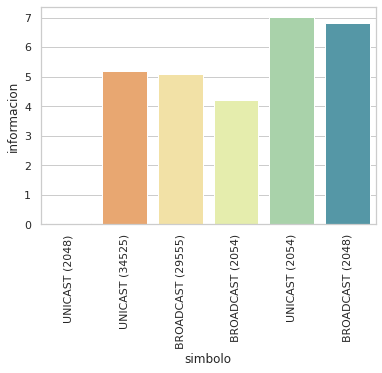

In [6]:
InformacionPorSimbolo('../capturas.csv')



In [8]:
print("HOLA" in ["HOLA asd", "aksldklsad"])

False


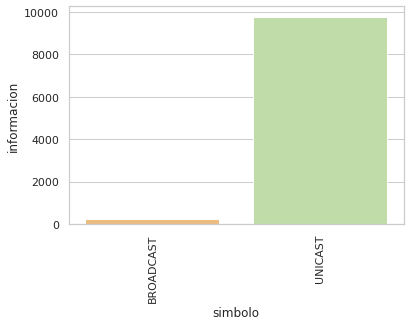

In [70]:
DistribucionPorTipoFuente('../capturas.csv')

In [1]:
#!/usr/bin/env python3
from scapy.all import *
from scapy.layers.l2 import Ether
import numpy as np
import pandas as pd
import os
from datetime import datetime

S1 = {}
data = {}

def mostrar_fuente(S):
    N = sum(S.values())
    simbolos = sorted(S.items(), key=lambda x: -x[1])
    print("S: ")
    print("\n".join([ " %s : %.5f - I: %.5f" % (d,k/N,- math.log(k/N,2)) for d,k in simbolos ]))
    H = - math.fsum([(k/N * math.log(k/N,2)) for d,k in simbolos ])
    print("H(S): %.5f" %  H )

def callback(pkt):
    if pkt.haslayer(Ether):
        dire = "BROADCAST" if pkt[Ether].dst=="ff:ff:ff:ff:ff:ff" else "UNICAST"
        
        #s_i = (dire, proto) # Aca se define el simbolo de la fuente
        # s_i = dire 

        proto = pkt[Ether].type # El campo type del frame tiene el protocolo
        s_i = dire + " ("+str(proto)+")"
        if s_i not in S1:
            S1[s_i] = 0.0

        S1[s_i] += 1.0
        S2 = S1.copy()
        data[datetime.now()] = S2.values()


sniff(prn=callback, count=100)

mostrar_fuente(S1)

df = pd.DataFrame.from_dict(data, orient='index', columns=S1.keys())
df = df.fillna(0)
df.to_csv(path='muestras\capturas.csv')


PermissionError: [Errno 1] Operation not permitted